<a href="https://colab.research.google.com/github/naufalfrdss/DeepLearning/blob/main/UAS/Chapter%2010/Introduction_to_Neural_Networks_with_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import dan Load Dataset

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Load dataset Fashion MNIST
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Normalisasi dan Split Data

In [2]:
# Bagi data menjadi train, validasi, dan test; skala ke [0, 1]
X_train, X_valid = X_train_full[:-5000]/255.0, X_train_full[-5000:]/255.0
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]
X_test = X_test / 255.0


Definisikan Model

In [3]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),           # 1D flatten dari 2D
    keras.layers.Dense(300, activation="relu"),           # hidden layer 1
    keras.layers.Dense(100, activation="relu"),           # hidden layer 2
    keras.layers.Dense(10, activation="softmax")          # output layer: 10 kelas
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Compile Model

In [4]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",         # stochastic gradient descent
              metrics=["accuracy"])


Training Model

In [5]:
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid))


Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.6905 - loss: 0.9849 - val_accuracy: 0.8128 - val_loss: 0.5254
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8295 - loss: 0.4970 - val_accuracy: 0.8328 - val_loss: 0.4679
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8421 - loss: 0.4530 - val_accuracy: 0.8508 - val_loss: 0.4166
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8553 - loss: 0.4148 - val_accuracy: 0.8562 - val_loss: 0.3984
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8598 - loss: 0.3976 - val_accuracy: 0.8636 - val_loss: 0.3816
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8696 - loss: 0.3715 - val_accuracy: 0.8594 - val_loss: 0.3903
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8711 - loss: 0.3605 - val_accuracy: 0.8674 - val_loss: 0.3686
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8738 - loss: 0.3588

Evaluasi Model

In [6]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test accuracy:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8681 - loss: 0.3745
Test accuracy: 0.8648999929428101


Visualisasi Akurasi Training & Validasi

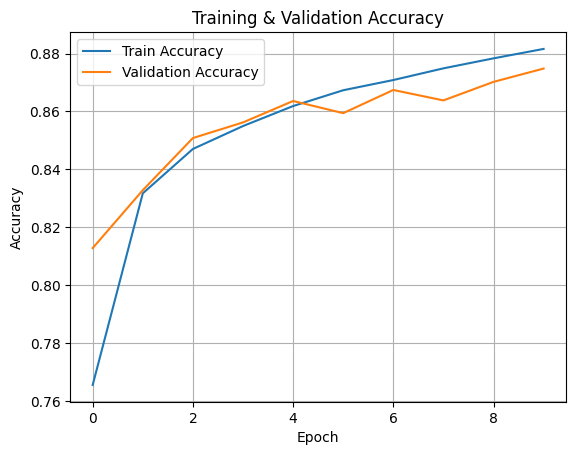

In [7]:
plt.plot(history.history['accuracy'], label="Train Accuracy")
plt.plot(history.history['val_accuracy'], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training & Validation Accuracy")
plt.legend()
plt.grid()
plt.show()
